In [46]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 50
np.random.seed(seed)

In [47]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [48]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
dropout_36 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 248, 64)           6208      
_________________________________________________________________
dropout_37 (Dropout)         (None, 248, 64)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 15872)             0         
__________

In [49]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
69s - loss: 0.4848 - acc: 0.7154 - val_loss: 0.3507 - val_acc: 0.8468
Epoch 2/5
68s - loss: 0.2285 - acc: 0.9072 - val_loss: 0.2600 - val_acc: 0.8910
Epoch 3/5
68s - loss: 0.1660 - acc: 0.9382 - val_loss: 0.2811 - val_acc: 0.8881
Epoch 4/5
68s - loss: 0.1236 - acc: 0.9554 - val_loss: 0.3168 - val_acc: 0.8808
Epoch 5/5
68s - loss: 0.0910 - acc: 0.9668 - val_loss: 0.3239 - val_acc: 0.8811
Accuracy: 88.11%


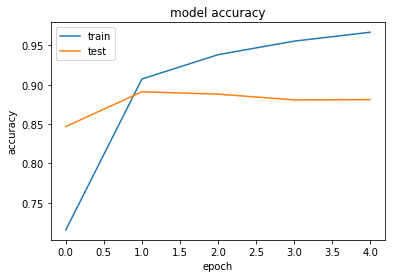

In [50]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()